In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [115]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [116]:
# Load the data
df = pd.read_csv('clean_housing_data.csv')
df

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,212183,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212184,212184,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212185,212185,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
212186,212186,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [117]:
region_counts=df.region.value_counts()

<AxesSubplot:ylabel='Density'>

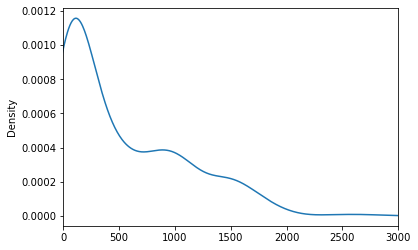

In [118]:
region_counts.plot.density(xlim=[0,3000])

In [119]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_type = pd.DataFrame(enc.fit_transform(df.type.values.reshape(-1,1)))

# Rename encoded columns
encode_df_type.columns = enc.get_feature_names(['type'])
encode_df_type.head()

,type_apartment,type_house,type_townhouse
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [120]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_region = pd.DataFrame(enc.fit_transform(df.region.values.reshape(-1,1)))

# Rename encoded columns
encode_df_region.columns = enc.get_feature_names(['region'])
encode_df_region.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,region_winchester,region_winston-salem,region_worcester / central MA,region_wyoming,region_yakima,region_york,region_youngstown,region_yuba-sutter,region_yuma,region_zanesville / cambridge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_laundry = pd.DataFrame(enc.fit_transform(df.laundry_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_laundry.columns = enc.get_feature_names(['laundry_options'])
encode_df_laundry.head()

,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [122]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_parking = pd.DataFrame(enc.fit_transform(df.parking_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_parking.columns = enc.get_feature_names(['parking_options'])
encode_df_parking.head()

,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df=df.merge(encode_df_region,left_index=True,right_index=True).drop("region",1)

In [124]:
df=df.merge(encode_df_type,left_index=True,right_index=True).drop("type",1)
df

,Unnamed: 0,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,region_wyoming,region_yakima,region_york,region_youngstown,region_yuba-sutter,region_yuma,region_zanesville / cambridge,type_apartment,type_house,type_townhouse
0,0,1148,1078,3,2.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1813,1683,2,2.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,935,661,1,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,212183,1960,1198,2,2.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212184,212184,1295,957,2,2.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212185,212185,1249,840,2,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212186,212186,1429,976,2,2.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [125]:
df=df.merge(encode_df_laundry,left_index=True,right_index=True).drop("laundry_options",1, errors='ignore')
df


,Unnamed: 0,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,region_yuma,region_zanesville / cambridge,type_apartment,type_house,type_townhouse,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,0,1148,1078,3,2.0,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1813,1683,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,935,661,1,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,212183,1960,1198,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212184,212184,1295,957,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212185,212185,1249,840,2,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212186,212186,1429,976,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
df=df.merge(encode_df_parking,left_index=True,right_index=True).drop("parking_options",1, errors='ignore')
df

,Unnamed: 0,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,0,1148,1078,3,2.0,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1813,1683,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,935,661,1,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1095,708,1,1.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,212183,1960,1198,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212184,212184,1295,957,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212185,212185,1249,840,2,1.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212186,212186,1429,976,2,2.0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df.describe()

,Unnamed: 0,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
count,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,...,212188.000000,212188.000000,212188.00000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000
mean,106093.500000,1222.172116,984.290167,1.878344,1.465905,0.809061,0.778970,0.653892,0.105180,0.017725,...,0.011495,0.223523,0.43798,0.158477,0.168662,0.071616,0.008158,0.527584,0.064919,0.000584
std,61253.543797,572.012680,338.140255,0.836628,0.553398,0.393042,0.414942,0.475729,0.306786,0.131950,...,0.106595,0.416607,0.49614,0.365189,0.374454,0.257851,0.089952,0.499240,0.246383,0.024167
min,0.000000,500.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53046.750000,830.000000,750.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106093.500000,1070.000000,944.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,159140.250000,1459.000000,1137.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,212187.000000,6000.000000,2500.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
df.columns

Index(['Unnamed: 0', 'price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge',
       ...
       'laundry_options_no laundry on site', 'laundry_options_w/d hookups',
       'laundry_options_w/d in unit', 'parking_options_attached garage',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_no parking', 'parking_options_off-street parking',
       'parking_options_street parking', 'parking_options_valet parking'],
      dtype='object', length=429)

In [129]:
# Create our features
X= df.drop(columns="price")

# Create our target
y = df['price']

In [130]:
#reg=linear_model.LinearRegression()


In [131]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [132]:
# instantiate, fit
linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [133]:
#print linear regression intercept
linreg.intercept_

451878369.70156497

In [134]:
#print linear regression coef 
print (linreg.coef_)

[ 5.50387923e-04  5.18001903e-01  1.09459100e+01  6.39992167e+01
 -1.92841410e+01  4.81164989e+01 -7.04474716e+01  1.11280339e+01
  1.09937282e+02  7.57027467e+01 -2.75985323e+07 -2.76004946e+07
 -2.76005200e+07 -2.76003632e+07 -2.76004153e+07 -2.76005696e+07
 -2.76005479e+07 -2.76004407e+07 -2.76002593e+07 -2.76000563e+07
 -2.75998215e+07 -2.76006855e+07 -2.76001833e+07 -2.76005647e+07
 -2.76003389e+07 -2.76001413e+07 -2.76005951e+07 -2.76003861e+07
 -2.75999681e+07 -2.76003170e+07 -2.76000352e+07 -2.76004364e+07
 -2.76004166e+07 -2.76003239e+07 -2.76000123e+07 -2.76004110e+07
 -2.76000390e+07 -2.76005656e+07 -2.76004944e+07 -2.76004631e+07
 -2.76005797e+07 -2.76003950e+07 -2.76005660e+07 -2.76002628e+07
 -2.76003460e+07 -2.75990709e+07 -2.75996998e+07 -2.76004159e+07
 -2.76001164e+07 -2.76004292e+07 -2.76006123e+07 -2.76003136e+07
 -2.76003100e+07 -2.76005875e+07 -2.75996432e+07 -2.76000113e+07
 -2.76004192e+07 -2.75996190e+07 -2.76001876e+07 -2.76004607e+07
 -2.76004004e+07 -2.76000

In [135]:
y_pred = linreg.predict(X_test)
y_pred

array([1132.65841836, 1344.50515759,  559.88561827, ..., 2110.989636  ,
        628.33734411,  749.3444168 ])

In [136]:
#comparer prediction with actual values
y_pred[0]

1132.6584183573723

In [137]:
y_pred[1]

1344.5051575899124

In [138]:
y_test

173767    1033
13122     1358
91056      599
78141      930
207478    1125
          ... 
37819     1085
100398    1004
23056     2000
16245      680
83181      652
Name: price, Length: 42438, dtype: int64

In [139]:
# mean square error
np.mean((y_pred-y_test)**2)

92967.17172490095

In [140]:
#Root mean square error
#from sklearn.metrics import mean_squared_error
#mse = mean_spuared_error(y_test,y_pred )
#np.sqrt(mse) 
#linreg.score(x_test,y_test)

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

304.9051848114444
